In [95]:
import pandas as pd
import numpy as np

2)What is the shape of "movies.csv"?


In [120]:
movies=pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [97]:
movies.shape

(9742, 3)

3)What is the shape of "ratings.csv"?

In [121]:
ratings=pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [99]:
ratings.shape

(100836, 4)

In [150]:
links=pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


4)How many unique "userId" are available in "ratings.csv"?


In [100]:
ratings['userId'].nunique()

610

5)Which movie has recieved maximum number of user ratings?

In [101]:
merged_data=pd.merge(movies,ratings,on='movieId')
ratings_count=merged_data.groupby('title')['rating'].count()
max_rated_movie=ratings_count.idxmax()
max_rated_movie

'Forrest Gump (1994)'

6)Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [145]:
tags = pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\tags.csv")

In [146]:
# Mergeing the two dataframes on 'movieId'
merged_data = pd.merge(movies, tags, on='movieId')

# Filtering the tags for "The Matrix (1999)"
matrix_tags = merged_data[merged_data['title'] == "Matrix, The (1999)"]['tag'].values

print("Tags for 'The Matrix (1999)':", matrix_tags)

Tags for 'The Matrix (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


7)What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [147]:
# Mergeing the two dataframes on 'movieId'
merged_data = pd.merge(movies, ratings, on='movieId')

# Filtering the ratings for "Terminator 2: Judgment Day (1991)"
merged_data[merged_data['title'] == "Terminator 2: Judgment Day (1991)"]['rating'].mean()

3.970982142857143

8)How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

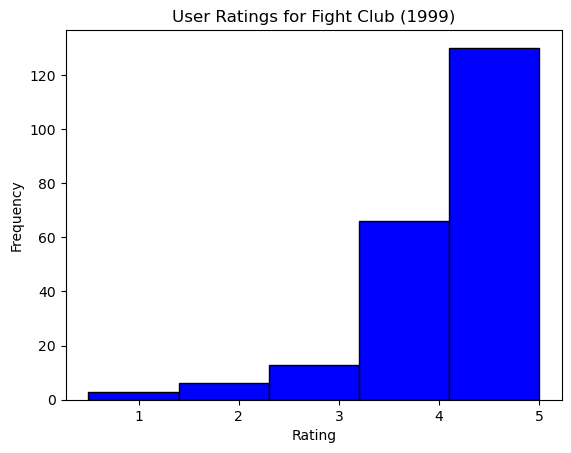

In [113]:
#Filter rows related to "Fight Club (1999)"
fight_club_ratings = merged_data[merged_data['title'] == 'Fight Club (1999)']

#histogram of user ratings
plt.hist(fight_club_ratings['rating'], bins=5, color='blue', edgecolor='black')
plt.title('User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

9)Which movie is the most popular based on average user ratings? Answer this question only after applying the above mentioned "Mandatory Operration".

In [105]:
movies_df = pd.read_csv(r"C:\Users\DELL\Downloads\movie_data\movies.csv")
grouped_ratings = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
print("Grouped Ratings:")
print(grouped_ratings.head())

Grouped Ratings:
   movieId  rating_count  rating_mean
0        1           215     3.920930
1        2           110     3.431818
2        3            52     3.259615
3        4             7     2.357143
4        5            49     3.071429


In [106]:
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.head())


Merged DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
3                         Comedy|Drama|Romance             7     2.357143  
4                                       Comedy            49     3.071429  


In [107]:
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Display the filtered DataFrame
print("\nFiltered DataFrame (Movies with more than 50 user ratings):")
print(filtered_df.head())


Filtered DataFrame (Movies with more than 50 user ratings):
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [108]:
sorted_df = filtered_df.sort_values(by='rating_mean', ascending=False)

# Display the top-rated movie
top_movie = sorted_df.iloc[0]['title']
print("Most Popular Movie based on Average User Ratings:", top_movie)

Most Popular Movie based on Average User Ratings: Shawshank Redemption, The (1994)


10)Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [109]:
top_rated_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_rated_movies[['title', 'rating_count']])

Top 5 Popular Movies based on Number of User Ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


11)Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [110]:
sorted_by_ratings = filtered_df.sort_values(by='rating_count', ascending=False)

# Extract the title of the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_by_ratings[sorted_by_ratings['genres'].str.contains('Sci-Fi')].iloc[2]['title']

print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:", third_most_popular_sci_fi)

Third Most Popular Sci-Fi Movie based on Number of User Ratings: Jurassic Park (1993)


12)Mention the movieId of the movie which has the highest IMDB rating.

In [ ]:
import numpy as np
from bs4 import BeautifulSoup
movies_with_imdb_ids = pd.merge(filtered_df, links, on='movieId', how='inner')

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews

# Iterate through movies with IMDB IDs and scrape reviews
reviews_data = []
for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    reviews_data.extend([(imdb_id, review) for review in movie_reviews])

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame(reviews_data, columns=['imdbId', 'Review_Text'])

In [ ]:
reviews_df

13)Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [ ]:
merged_reviews_links = pd.merge(reviews_df, links, on='imdbId', how='inner')

merged_reviews_links_ratings = pd.merge(merged_reviews_links,filtered_data, on = 'movieId', how = 'inner')

In [ ]:
merged_reviews_links_ratings.sort_values(by='count',ascending=False)